# Safety of Neighborhoods

## Introduction
As a group, we decided to choose the best neighborhood based on which one would be the best to raise a family in. Because of this, we thought that safety was a very important characteristic of a good neighborhood to raise your family in. 

## The Metric
I am measuring the best neighborhood to have a family based on the safest neighborhood. To do this, I am measuring which neighborhood has the most Juvenile runaways. To do this, I am using a dataset that consists of crime reports from October 18th, 2023 to November 8th, 2023. I will decide the safest neighborhood based on the lowest number crimes reported within that range.

In [1]:
import pandas as pd
data = pd.read_csv("Police-Blotter.csv", sep=',')
data.head(10)

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,3160200,322852487,23160391,18,2023-10-09T02:51:00,"900 Block Cherokee Rdwy Pittsburgh, PA 15219",Y,Upper Hill,2,STOLEN PROPERTY - OTHER,13(a)(16) Possession of Controlled Substance,506.0,NaN,NaN,NaN,NaN
1,3160201,322852762,23160392,10,2023-10-09T02:25:00,"2500 Block Chauncey Dr Pittsburgh, PA 15219",Y,Bedford Dwellings,2,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",509.0,6.0,3.0,-79.973840,40.450983
2,3160202,322852787,23160384,4,2023-10-09T01:40:00,"Station St & Centre Ave Pittsburgh, PA",Y,East Liberty,5,AGG-ASSAULT,2702 Aggravated Assault. / 3925 Receiving Stol...,1113.0,9.0,2.0,-79.921301,40.462879
3,3160203,322893569,23160534,6,2023-10-09T07:00:00,"200 Block Hallock St Pittsburgh, PA 15211",N,Duquesne Heights,3,THEFT FROM AUTO,3934 Theft from Vehicle,1911.0,2.0,5.0,-80.017997,40.434786
4,3160204,322917429,23160673,10,2023-10-09T16:30:00,"100 Block Frustum St Pittsburgh, PA 15204",N,Esplen,6,SIMPLE ASSAULT,2701 Simple Assault.,2017.0,NaN,NaN,NaN,NaN
5,3160205,324235775,23171535,27,2023-10-28T05:00:00,"7200 Block Monticello St Pittsburgh, PA 15208",N,Homewood North,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1302.0,9.0,2.0,-79.895444,40.459513
6,3160206,324798988,23176386,10,2023-11-06T10:30:00,"100 Block Ruth St Pittsburgh, PA 15211",Y,Mount Washington,3,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",1807.0,2.0,5.0,-80.005232,40.423791
7,3160207,324799806,23176355,0,2023-11-06T11:00:00,"7300 Block Hamilton Ave Pittsburgh, PA 15208",Y,Homewood South,5,99,4524 Windshield Obstructions and Wipers. / 627...,1303.0,9.0,2.0,-79.895648,40.454024
8,3160208,324806932,23176425,6,2023-11-05T22:30:00,"700 Block Penn Ave Pittsburgh, PA 15219",N,Central Business District,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,201.0,NaN,NaN,-79.884672,40.443511
9,3160209,324810215,23176417,99,2023-11-06T12:51:00,"7000 Block Kelly St Pittsburgh, PA 15208",N,Homewood South,5,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),1303.0,9.0,2.0,-79.901815,40.456612


In [4]:
data['OFFENSES'].value_counts()

9999 9999 - (Misc. Incident):                                                                                                                                                                                       105
3921(a) Theft by Unlawful Taking or Disposition - Movable item                                                                                                                                                       94
3745 Accidents Involving Damage to Unattended Veh.or Prop.                                                                                                                                                           89
3304 Criminal Mischief.                                                                                                                                                                                              85
3921 Theft by Unlawful Taking or Disposition.                                                                                           

In [13]:
data = data[["INCIDENTNEIGHBORHOOD", "INCIDENTHIERARCHYDESC"]]
df = pd.DataFrame(data)
df

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC
0,Upper Hill,STOLEN PROPERTY - OTHER
1,Bedford Dwellings,HARRASSMENT/THREAT/ATTEMPT/PHY
2,East Liberty,AGG-ASSAULT
3,Duquesne Heights,THEFT FROM AUTO
4,Esplen,SIMPLE ASSAULT
...,...,...
1995,Garfield,SIMPLE ASSAULT
1996,East Hills,99
1997,Central Business District,TAMPER WITH/FAB PHYS EVIDENCE
1998,California-Kirkbride,99


In [14]:
df = df['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)
df.head(100)

New Homestead                  1
Windgap                        1
Mount Oliver                   1
Chartiers City                 2
Ridgemont                      2
                            ... 
Crawford-Roberts              50
Shadyside                     57
Carrick                       58
South Side Flats             120
Central Business District    186
Name: INCIDENTNEIGHBORHOOD, Length: 90, dtype: int64

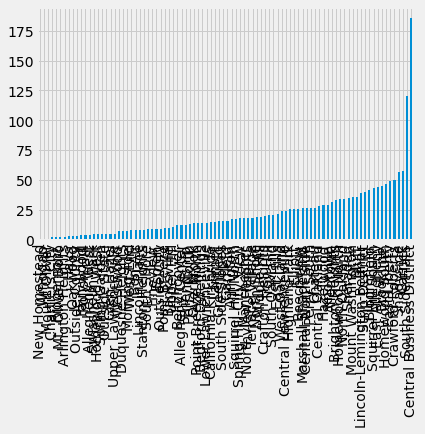

In [15]:
df.plot(kind = "bar")

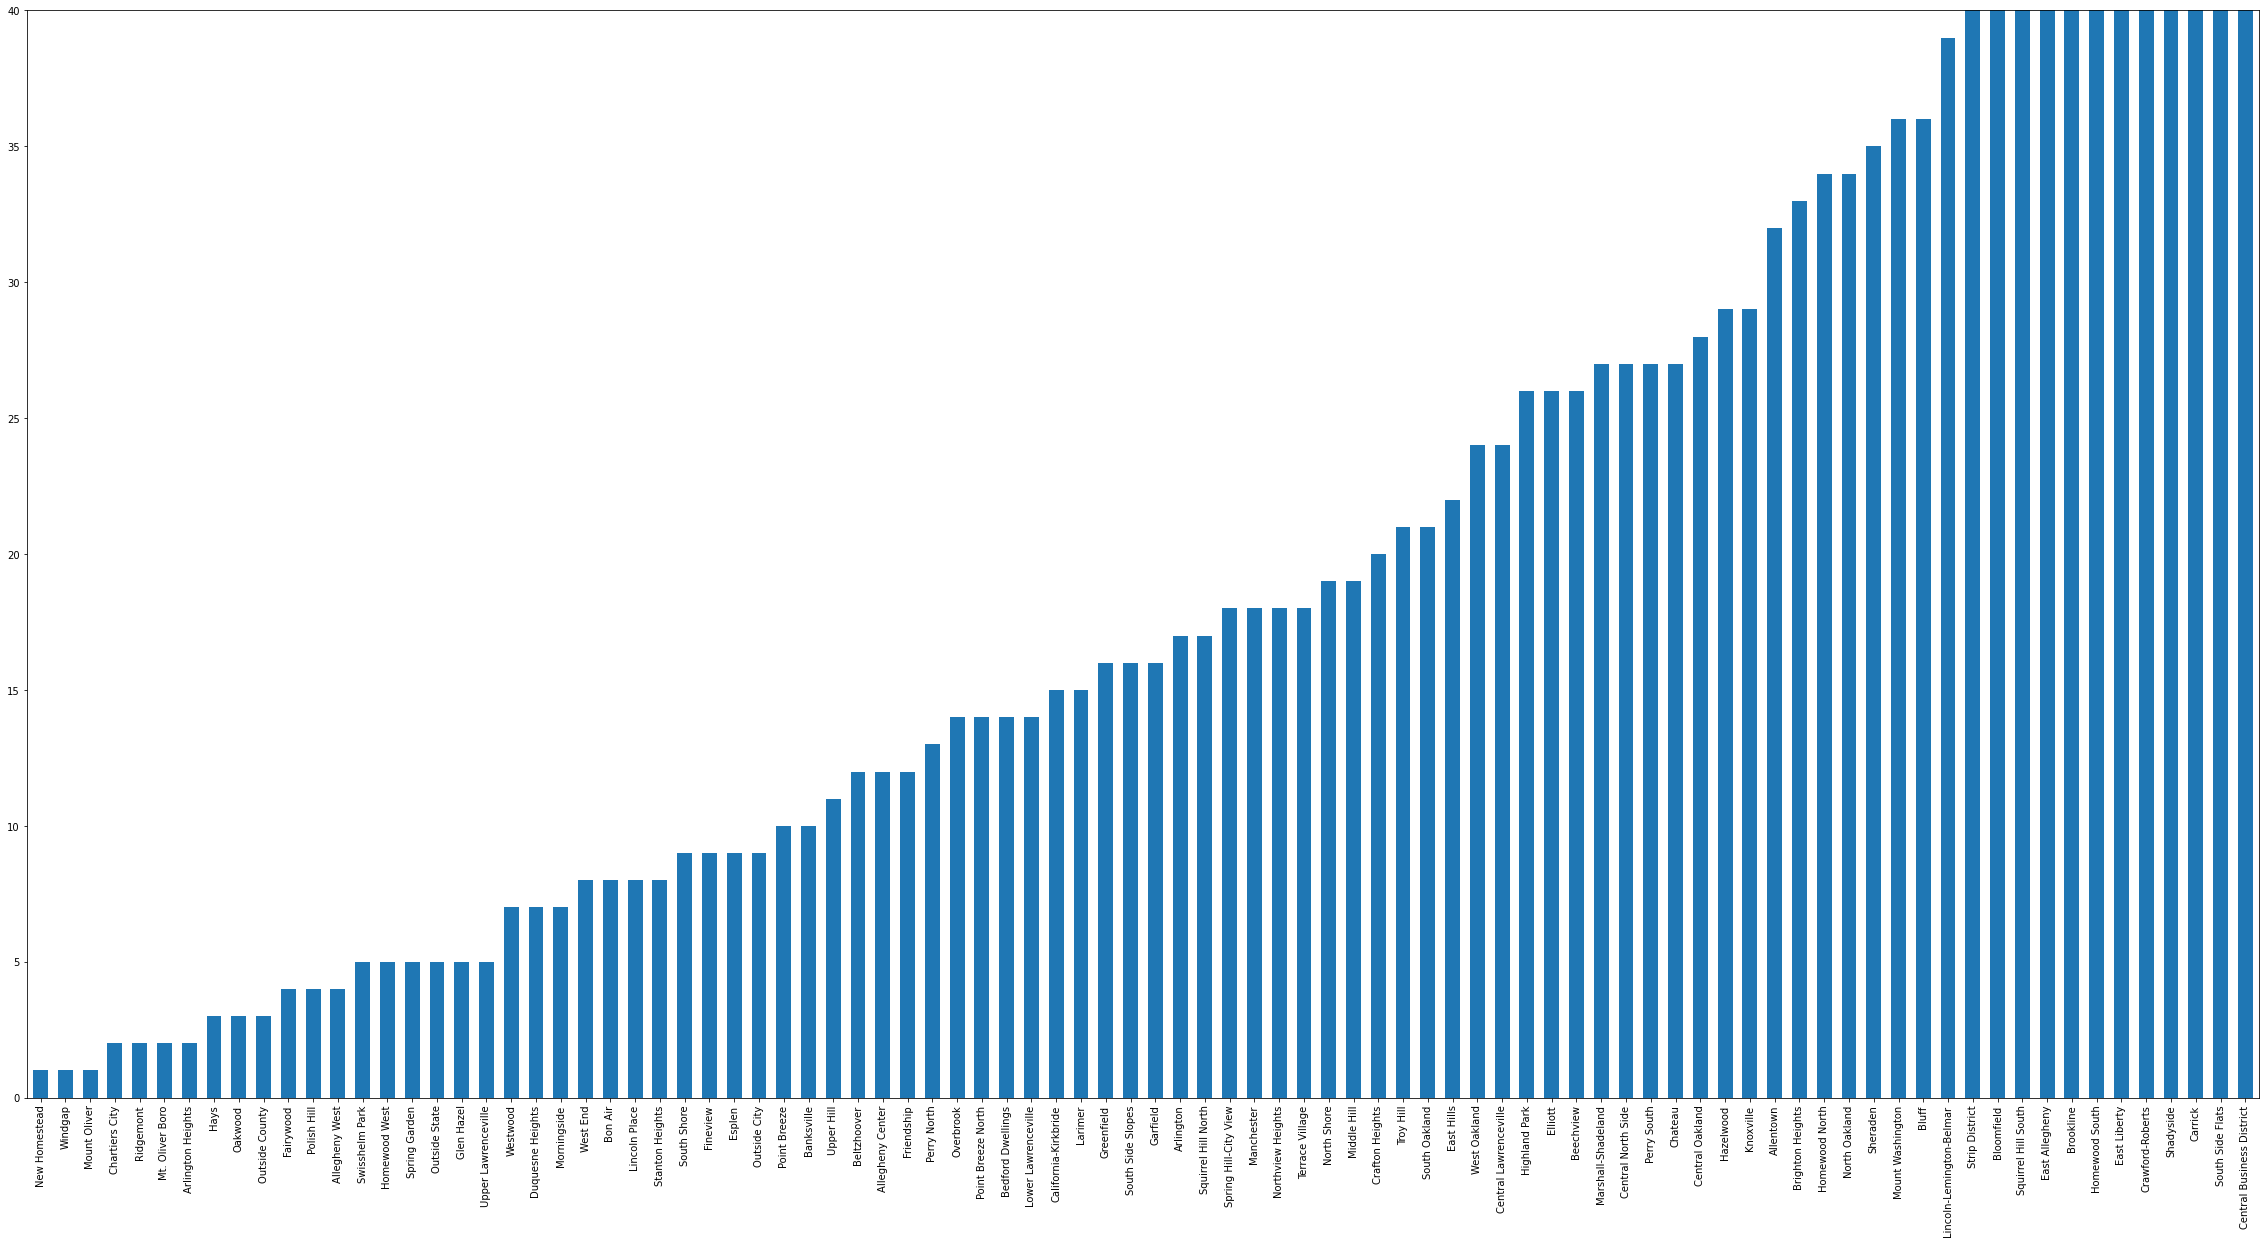

In [6]:
df.plot(kind = "bar", width = .6, figsize =(40, 20), ylim = (0, 40))

Text(0, 0.5, 'Neighborhood')

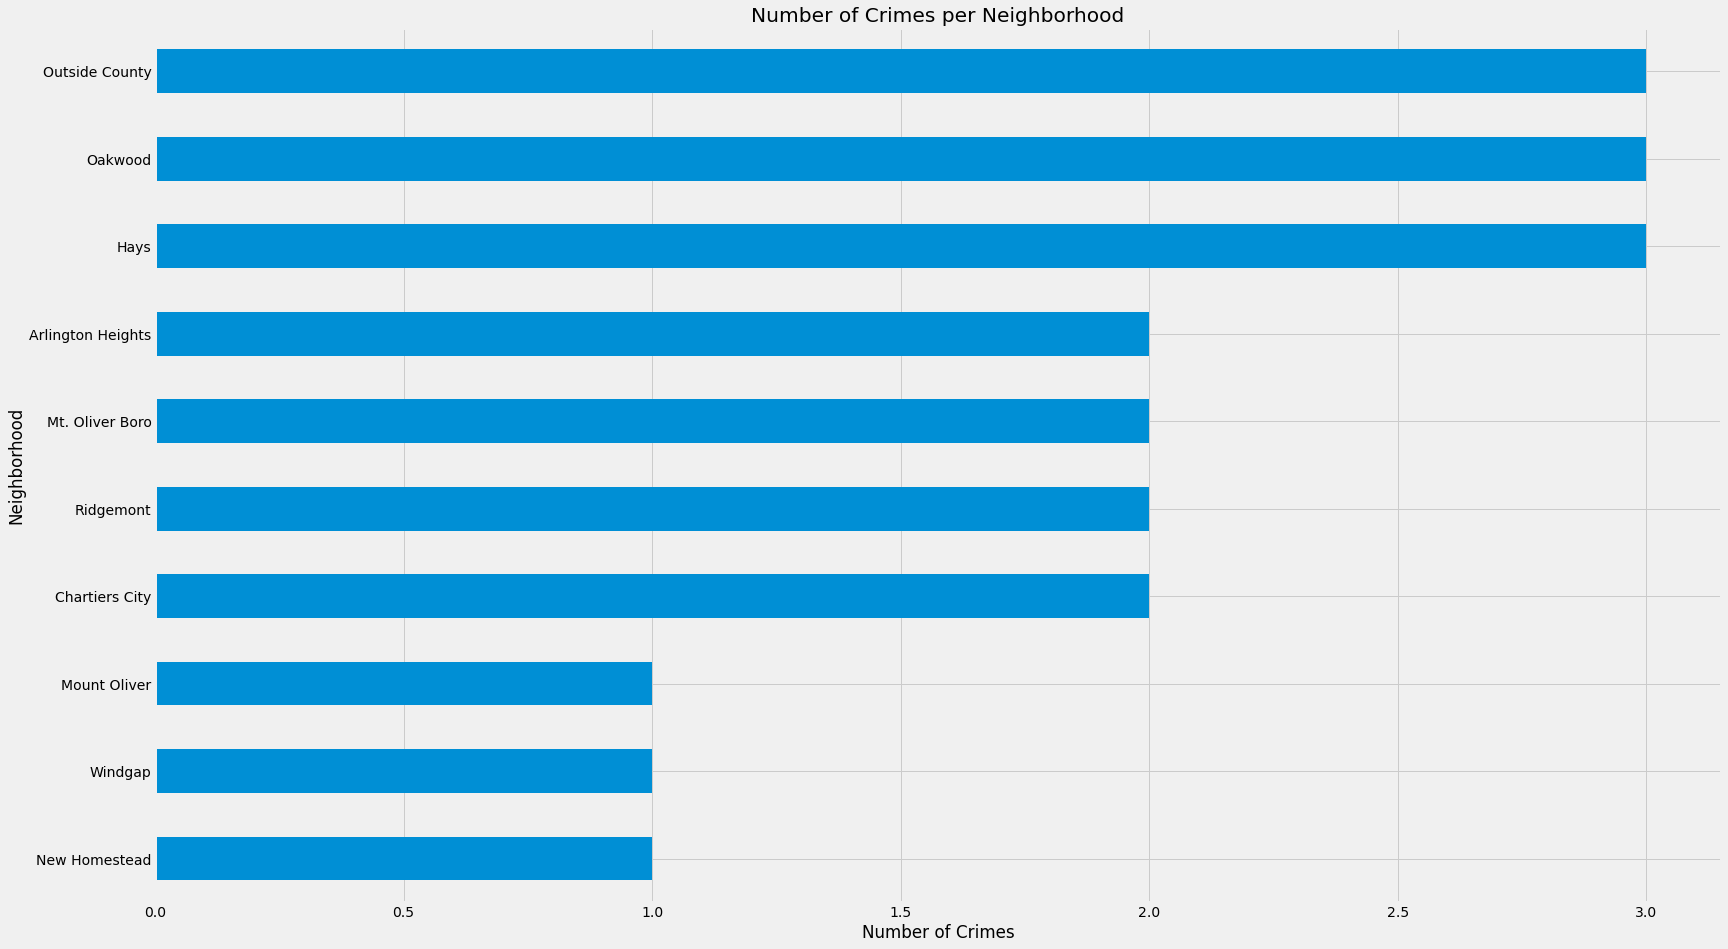

In [17]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
df[0:10].plot.barh(x = "Neighborhood", y = "runaways",figsize=(25,15))
plt.title("Number of Crimes per Neighborhood")
plt.xlabel("Number of Crimes")
plt.ylabel("Neighborhood")

## Conclusion
Because Mount Oliver, Windgap, and New Homestead each had only one crime report, they are the safest neighborhoods. 